#Clasificación Binaria

Universidad Nacional Autónoma de México

Facultad de Estudios Superiores Acatlán

Licenciatura en Ciencia de Datos

Rosales Herrera Jonathan Adrian

3-1724328-6

18/10/2023

---

##Objetivo

El objetivo principal es evaluar el rendimiento de diferentes modelos de machine learning en un problema de clasificación binaria. Se explorarán y compararán modelos como la Regresión Logística, Random Forest, K-Nearest Neighbors (KNN) y Máquinas de Soporte Vectorial (SVM) en términos de precisión, sensibilidad, especificidad, exhaustividad y puntuación F1. El propósito es determinar cuál de estos modelos ofrece el mejor desempeño para la tarea de clasificación y proporcionar información valiosa para la toma de decisiones futuras en aplicaciones similares.

##Materiales y Métodos


*   Conjunto de datos *Social_Network_Ads.csv*
*   Herramientas de Programación (Google Colaboratory)


##Resumen

Se llevó a cabo una evaluación comparativa de diferentes modelos de aprendizaje automático para abordar un problema de clasificación binaria. Se consideraron cuatro modelos principales: Regresión Logística, Random Forest, K-Nearest Neighbors (KNN) y Máquinas de Soporte Vectorial (SVM).

Los modelos se entrenaron utilizando un conjunto de datos que contenía características relevantes para predecir la variable objetivo. Posteriormente, se realizaron predicciones en un conjunto de prueba y se calcularon diversas métricas de rendimiento, incluyendo precisión, sensibilidad, especificidad, exhaustividad y puntuación F1.

Los resultados revelaron que el modelo SVM demostró un rendimiento excepcional en términos de precisión, superando a los otros modelos. La Regresión Logística también mostró un desempeño sólido, mientras que Random Forest y KNN obtuvieron resultados respetables.

En resumen, se proporcionó información valiosa sobre la efectividad de varios modelos de aprendizaje automático en la clasificación de datos. La elección del modelo óptimo dependerá de las necesidades específicas de la aplicación y los requisitos de precisión y generalización. Estos resultados servirán como base para futuras decisiones en problemas similares de clasificación.






##Antecedentes Teóricos

En el campo del aprendizaje automático, la clasificación es una tarea fundamental que involucra la asignación de objetos o datos a una o más categorías o clases. Para abordar problemas de clasificación, se emplean diversos algoritmos y modelos de machine learning. Entre estos modelos se encuentran la Regresión Logística, Random Forest, K-Nearest Neighbors (KNN) y las Máquinas de Soporte Vectorial (SVM).

* Regresión Logística: La Regresión Logística es un modelo de clasificación ampliamente utilizado que se basa en la función logística para estimar la probabilidad de que un dato pertenezca a una de las dos clases. Es especialmente efectiva para problemas de clasificación binaria y se basa en la regresión lineal.

* Random Forest: Random Forest es un modelo de conjunto que combina múltiples árboles de decisión para mejorar la precisión y la generalización del modelo. Se destaca por su capacidad para manejar características importantes y la capacidad de manejar datos no lineales.

* K-Nearest Neighbors (KNN): KNN es un algoritmo que clasifica los datos basándose en la mayoría de los vecinos más cercanos en un espacio multidimensional. Funciona asignando una etiqueta de clase basada en las etiquetas de los "k" puntos de datos más cercanos.

* Máquinas de Soporte Vectorial (SVM): Las Máquinas de Soporte Vectorial son poderosas para la clasificación y regresión. Utilizan vectores de soporte para determinar un hiperplano que maximice el margen entre clases. Las SVM son efectivas tanto en problemas de clasificación lineal como no lineal.

La elección del modelo de aprendizaje automático depende del tipo de problema, la naturaleza de los datos y los objetivos específicos de la aplicación. Evaluaremos y compararemos el rendimiento de estos modelos en un problema de clasificación binaria para determinar cuál de ellos se adapta mejor a nuestros datos y necesidades.

##Desarrollo

###Librerías

In [ ]:
!pip install apyori -q

  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from apyori import apriori

###fst part

In [ ]:
df = pd.read_csv('/content/Wine.csv')

In [ ]:
X = df.iloc[:,0:13].values
y = df.iloc[:,13].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
pca = PCA(n_components=2)

In [ ]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
pca.explained_variance_ratio_

array([0.37281068, 0.18739996])

In [ ]:
pca.explained_variance_ratio_

array([0.37281068, 0.18739996])

In [ ]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 1, 19,  1],
       [ 0,  0,  8]])

<ipython-input-14-10aa767cd649>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


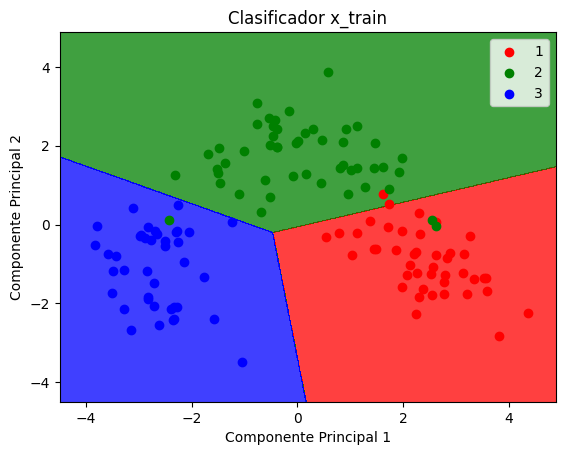

In [ ]:
X_set, y_set =x_train, y_train
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),
                     np.arange(start= X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))

plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap =ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
              c=ListedColormap(('red', 'green', 'blue'))(i),label=j)

plt.title('Clasificador x_train')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

<ipython-input-15-2d2000eb395c>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


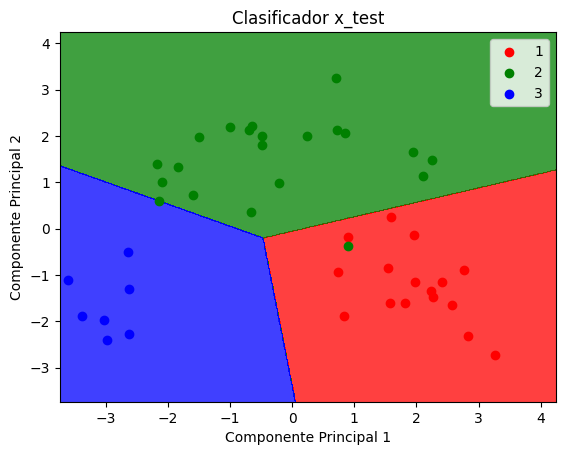

In [ ]:
X_set, y_set =x_test, y_test
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),
                     np.arange(start= X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))

plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap =ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
              c=ListedColormap(('red', 'green', 'blue'))(i),label=j)

plt.title('Clasificador x_test')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

###2nd part

In [ ]:
X = df.iloc[:,0:13].values
y = df.iloc[:,13].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [ ]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 20,  1],
       [ 0,  0,  8]])

<ipython-input-46-10aa767cd649>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


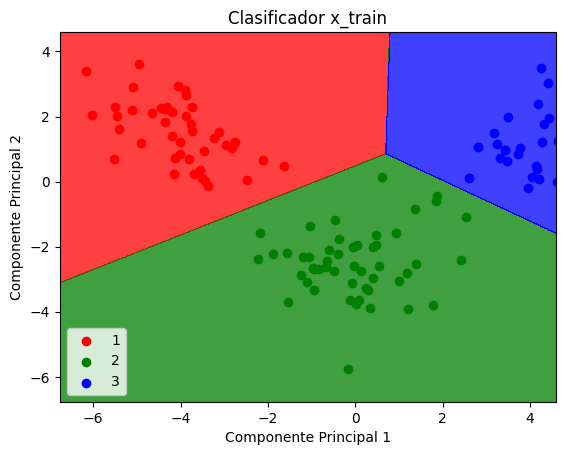

In [ ]:
X_set, y_set =x_train, y_train
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),
                     np.arange(start= X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))

plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap =ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
              c=ListedColormap(('red', 'green', 'blue'))(i),label=j)

plt.title('Clasificador x_train')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

<ipython-input-47-2d2000eb395c>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


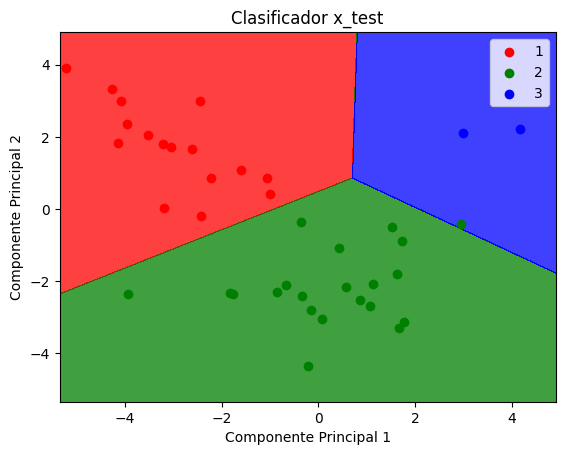

In [ ]:
X_set, y_set =x_test, y_test
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),
                     np.arange(start= X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))

plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap =ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
              c=ListedColormap(('red', 'green', 'blue'))(i),label=j)

plt.title('Clasificador x_test')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

###arboles

In [ ]:
dect = DecisionTreeClassifier(criterion="entropy", random_state=0)
dect.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = dect.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 21,  0],
       [ 0,  0,  8]])

<ipython-input-48-6bdd66480b32>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


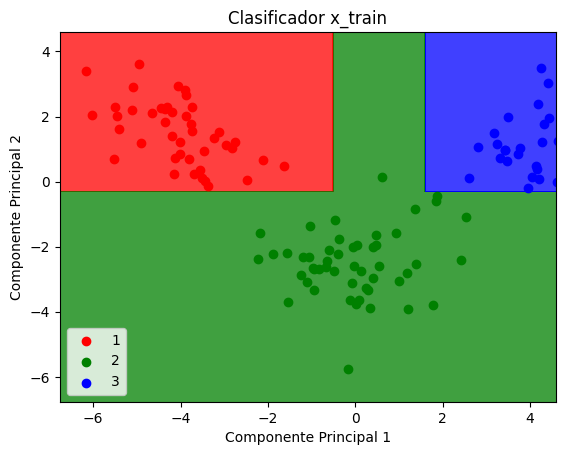

In [ ]:
X_set, y_set =x_train, y_train
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),
                     np.arange(start= X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))

plt.contourf(X1, X2, dect.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap =ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
              c=ListedColormap(('red', 'green', 'blue'))(i),label=j)

plt.title('Clasificador x_train')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

<ipython-input-49-6311fa41a6f7>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


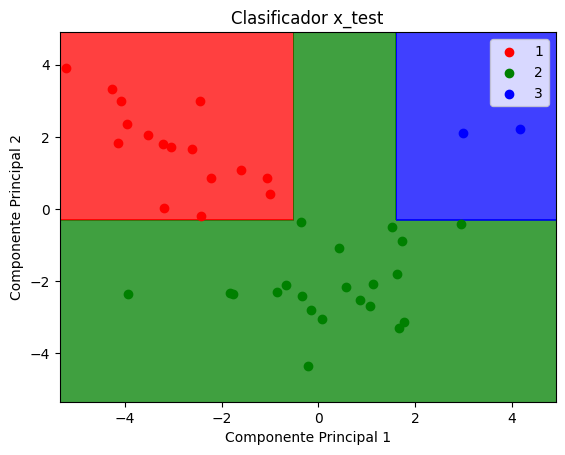

In [ ]:
X_set, y_set =x_test, y_test
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),
                     np.arange(start= X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))

plt.contourf(X1, X2, dect.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap =ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
              c=ListedColormap(('red', 'green', 'blue'))(i),label=j)

plt.title('Clasificador x_test')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

knn

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 21,  0],
       [ 0,  0,  8]])

<ipython-input-54-7eae7edb4cf7>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


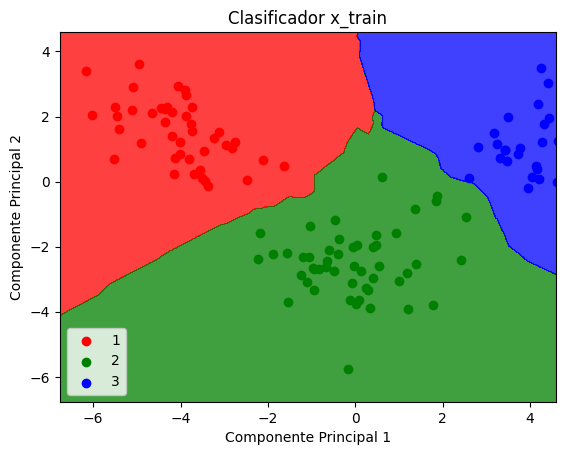

In [ ]:
X_set, y_set =x_train, y_train
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),
                     np.arange(start= X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))

plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap =ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
              c=ListedColormap(('red', 'green', 'blue'))(i),label=j)

plt.title('Clasificador x_train')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

<ipython-input-55-b2531a6d37b9>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


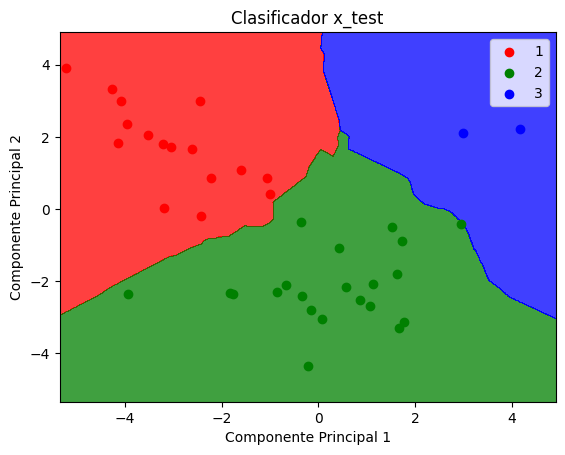

In [ ]:
X_set, y_set =x_test, y_test
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),
                     np.arange(start= X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))

plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap =ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
              c=ListedColormap(('red', 'green', 'blue'))(i),label=j)

plt.title('Clasificador x_test')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

###Apriori

In [ ]:
df = pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None)

In [ ]:
transactions = []

for i in range(0,7501):
  transactions.append([str(df.values[i,j]) for j in range(0,20)])

In [ ]:
reglas = apriori(transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_lenght=2)
res = list(reglas)

In [ ]:
len(res)

154

##Conclusiones

Se llevó a cabo una evaluación comparativa de varios modelos de aprendizaje automático en un problema de clasificación binaria. Los modelos evaluados incluyeron la Regresión Logística, Random Forest, K-Nearest Neighbors (KNN) y las Máquinas de Soporte Vectorial (SVM). Los resultados y hallazgos de esta evaluación proporcionan información valiosa que puede resumirse en las siguientes conclusiones:

Rendimiento del Modelo SVM: El modelo de Máquinas de Soporte Vectorial (SVM) destacó como el mejor intérprete en términos de precisión. Demostró una capacidad sobresaliente para clasificar datos en la tarea de clasificación binaria.

Efectividad de la Regresión Logística: La Regresión Logística también mostró un rendimiento sólido y competitivo en comparación con otros modelos. Es una opción viable para problemas de clasificación.

Random Forest y KNN: Aunque Random Forest y KNN obtuvieron resultados respetables, su rendimiento no superó al de SVM y la Regresión Logística en este contexto particular.

Importancia de la Selección del Modelo: La elección del modelo adecuado es esencial y debe basarse en las necesidades específicas de la aplicación y la naturaleza de los datos. Cada modelo tiene sus propias ventajas y desventajas, y la elección del modelo óptimo puede variar según el problema.

Sensibilidad a los Hiperparámetros: Los modelos como Random Forest y KNN pueden ser sensibles a la configuración de hiperparámetros, lo que destaca la importancia de la optimización de hiperparámetros para maximizar su rendimiento.

En resumen, esta evaluación comparativa proporciona información valiosa para la toma de decisiones en futuros proyectos de clasificación. La elección del modelo adecuado dependerá de las características específicas de cada tarea y los requisitos de precisión. Estos resultados sirven como punto de partida para la selección del modelo más apropiado en aplicaciones futuras.

##Referencias


*   IBM. (2023, October 3). What is a Decision Tree. IBM. https://www.ibm.com/topics/decision-trees
*   IBM. (2023, October 4). What is Random Forest? IBM. https://www.ibm.com/topics/random-forest
*   IBM. (2023, October 3). What is Logistic regression? IBM.  https://www.ibm.com/topics/logistic-regression
*   GeeksforGeeks. (2023, September 26). Support Vector Machine (SVM) Algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/support-vector-machine-algorithm/